# Mutual Information 

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import code_two_states.generation_sequences as ge 
import code_two_states.inference_partners as inf
import code_two_states.mutual_info as mu
from code_two_states.utility_plot import *
from code_two_states.loop_function import *

########## ASPECT #################
width = "article"
width_pt = 430.00462

cmaps_sns = sns.color_palette("colorblind", 10)
l_AF = [0, 3, 2, 8, 1, 4, 5, 6, 7, 9]
cmaps = []
for i in l_AF:
    cmaps.append(cmaps_sns[i])
sns.set_theme(context='notebook', style='ticks', palette=cmaps, color_codes=True, rc=None)

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "arial",
    # Use 10pt font in plots, to maT_ch 10pt font in document
    "font.size": 10,
    "axes.titlesize" : 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth" : 1.3,
    'axes.linewidth' : 1,
}

plt.rcParams.update(tex_fonts)
########## ASPECT #################


Graph = nx.read_gexf("graphes/Graph_Erdos",node_type=int)

n_generations = 10 # 2^10 = 1024 chain of spin
middle_index = 100
n_mutations_branch = 5
n_avg = 30

Ta = 2.0
Tb = 5.0

s_train = 400
theta = 0.0
pseudo_count = 0.5
n_pair_species = 4

pseudo_count_MI = 0.015

label_0 = "Contacts only"
label_1 = "Phylo rand."
label_2 = "Contacts & phylogeny"
label_3 = "Phylogeny only"
label_4 = "Null model"
ylabel = "Correct prediction fraction"

## Impact number of mutations per generations

In [12]:
l_n_mutations_branch = np.linspace(2, 100, num=30, dtype=int)
n_seq = int(2**n_generations)
d_muta = {"n_mutations_branch" : l_n_mutations_branch}
sampling = ge.Sampling_msa_two_states(Graph)

sampling.T = Ta
l_msa_no_phylo_Ta = loop_on_function(n_avg,sampling.msa_no_phylo,n_seq)
l_l_msa_binary_tree_rand_Ta = loop_sampling_parameter(n_avg,d_muta,sampling.msa_binary_tree,n_generations=n_generations,start_equi=0)
l_l_msa_binary_tree_equi_Ta = loop_sampling_parameter(n_avg,d_muta,sampling.msa_binary_tree,n_generations=n_generations,start_equi=1)

l_l_msa_binary_tree_rand_phylo = loop_sampling_parameter(n_avg, d_muta,sampling.msa_binary_tree_pure_phylo, n_generations=n_generations, start_equi=0)

sampling.T = Tb
l_msa_no_phylo_Tb = loop_on_function(n_avg,sampling.msa_no_phylo,n_seq)
l_l_msa_binary_tree_rand_Tb = loop_sampling_parameter(n_avg,d_muta,sampling.msa_binary_tree,n_generations=n_generations,start_equi=0)
l_l_msa_binary_tree_equi_Tb = loop_sampling_parameter(n_avg,d_muta,sampling.msa_binary_tree,n_generations=n_generations,start_equi=1)

Standard Temperature is 1.0
Number of flip to reach equilibrium is 4000


## DCA

In [13]:
args = [s_train, pseudo_count, n_pair_species]

no_phylo_Ta = inf.Inference_Partner(l_msa_no_phylo_Ta, *args, fast=True)
l_binary_tree_rand_mut_Ta = loop_inf_partners_data(inf.Inference_Partner, l_l_msa_binary_tree_rand_Ta, theta, *args)
l_binary_tree_equi_mut_Ta = loop_inf_partners_data(inf.Inference_Partner, l_l_msa_binary_tree_equi_Ta, theta, *args)

l_binary_tree_rand_phylo = loop_inf_partners_data(inf.Inference_Partner, l_l_msa_binary_tree_rand_phylo, theta, *args)

no_phylo_Tb = inf.Inference_Partner(l_msa_no_phylo_Tb, *args, fast=True)
l_binary_tree_rand_mut_Tb = loop_inf_partners_data(inf.Inference_Partner, l_l_msa_binary_tree_rand_Tb, theta, *args)
l_binary_tree_equi_mut_Tb = loop_inf_partners_data(inf.Inference_Partner, l_l_msa_binary_tree_equi_Tb, theta, *args)

In [14]:
l_binary_tree_rand_mut_Ta

array([0.97202381, 0.98253401, 0.98748299, 0.99132653, 0.99323129,
       0.99458333, 0.99625   , 0.99172619, 0.98306973, 0.98005952,
       0.9627381 , 0.96318027, 0.93908163, 0.92817177, 0.90994898,
       0.86528912, 0.82681122, 0.8094898 , 0.81372449, 0.71332483,
       0.66837585, 0.70797619, 0.65602041, 0.66626701, 0.68579932,
       0.66214286, 0.56862245, 0.61340986, 0.62535714, 0.60258503])

## MI

In [15]:
args = [s_train, pseudo_count_MI, n_pair_species]

no_phylo_Ta_mi = mu.Inference_Partner_Mutual_Info(l_msa_no_phylo_Ta, *args, fast=True)
l_binary_tree_rand_mut_Ta_mi = loop_inf_partners_data(mu.Inference_Partner_Mutual_Info, l_l_msa_binary_tree_rand_Ta, theta, *args)
l_binary_tree_equi_mut_Ta_mi = loop_inf_partners_data(mu.Inference_Partner_Mutual_Info, l_l_msa_binary_tree_equi_Ta, theta, *args)

l_binary_tree_rand_phylo_mi = loop_inf_partners_data(mu.Inference_Partner_Mutual_Info, l_l_msa_binary_tree_rand_phylo, theta, *args)

no_phylo_Tb_mi = mu.Inference_Partner_Mutual_Info(l_msa_no_phylo_Tb, *args, fast=True)
l_binary_tree_rand_mut_Tb_mi = loop_inf_partners_data(mu.Inference_Partner_Mutual_Info, l_l_msa_binary_tree_rand_Tb, theta, *args)
l_binary_tree_equi_mut_Tb_mi = loop_inf_partners_data(mu.Inference_Partner_Mutual_Info, l_l_msa_binary_tree_equi_Tb, theta, *args)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


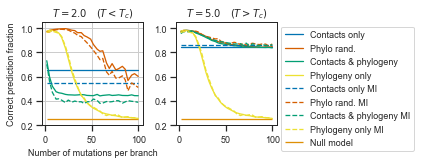

In [16]:
figsize = set_size(width,subplots=(1,2),scale_height=1.3)
fig, ax =  plt.subplots(figsize=figsize, ncols=2)

ax[0].plot(l_n_mutations_branch,[no_phylo_Ta for i in l_n_mutations_branch], color = cmaps[0], label = label_0)
ax[0].plot(l_n_mutations_branch,l_binary_tree_rand_mut_Ta, color = cmaps[1], label = label_1)
ax[0].plot(l_n_mutations_branch,l_binary_tree_equi_mut_Ta, color = cmaps[2], label = label_2)
ax[0].plot(l_n_mutations_branch,l_binary_tree_rand_phylo, color = cmaps[3], label = label_3)

ax[0].plot(l_n_mutations_branch,[no_phylo_Ta_mi for i in l_n_mutations_branch], ls="--", color = cmaps[0], label = label_0)
ax[0].plot(l_n_mutations_branch,l_binary_tree_rand_mut_Ta_mi, color = cmaps[1], ls="--", label = label_1 + " MI")
ax[0].plot(l_n_mutations_branch,l_binary_tree_equi_mut_Ta_mi, color = cmaps[2], ls="--", label = label_2 + " MI")
ax[0].plot(l_n_mutations_branch,l_binary_tree_rand_phylo_mi, color = cmaps[3], ls="--", label = label_3 + " MI")
ax[0].hlines(1/n_pair_species,l_n_mutations_branch[0],l_n_mutations_branch[-1], color = cmaps[4], label = label_4)
ax[0].set_xlabel("Number of mutations per branch")
ax[0].set_ylabel(ylabel)
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0].grid(which='both')
ax[0].set_title("$T = %s \quad (T < T_c)$"%Ta)
ax[0].set_ylim(0.2,1.05)

ax[1].plot(l_n_mutations_branch,[no_phylo_Tb for i in l_n_mutations_branch], color = cmaps[0], label = label_0)
ax[1].plot(l_n_mutations_branch,l_binary_tree_rand_mut_Tb, color = cmaps[1], label = label_1)
ax[1].plot(l_n_mutations_branch,l_binary_tree_equi_mut_Tb, color = cmaps[2], label = label_2)
ax[1].plot(l_n_mutations_branch,l_binary_tree_rand_phylo, color = cmaps[3], label = label_3)

ax[1].plot(l_n_mutations_branch,[no_phylo_Tb_mi for i in l_n_mutations_branch], ls="--", color = cmaps[0], label = label_0 + " MI")
ax[1].plot(l_n_mutations_branch,l_binary_tree_rand_mut_Tb_mi, color = cmaps[1], ls="--", label = label_1 + " MI")
ax[1].plot(l_n_mutations_branch,l_binary_tree_equi_mut_Tb_mi, color = cmaps[2], ls="--", label = label_2 + " MI")
ax[1].plot(l_n_mutations_branch,l_binary_tree_rand_phylo_mi, color = cmaps[3], ls="--", label = label_3 + " MI")
ax[1].hlines(1/n_pair_species,l_n_mutations_branch[0],l_n_mutations_branch[-1], color = cmaps[4], label = label_4)
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax[1].grid(which='both')
ax[1].set_title("$T = %s \quad (T > T_c)$"%Tb)
ax[1].legend(bbox_to_anchor=(1, 1))
ax[1].set_ylim(0.2,1.05)
   
fig.tight_layout()
fig.savefig("figures_MI_DCA/Partners_NumberMutation_MI_DCA.eps",bbox_inches = "tight")
plt.show()